# My First Regression Model
## 1) Reading .CSV File and Displaying the Results

### Importing the Libraries


In [1]:
import matplotlib.pyplot 
import pandas
import pylab as pl
import numpy
%matplotlib inline

### Reading .CSV File

In [2]:
readFile = pandas.read_csv("FuelConsumptionCo2.csv")

### Displaying Data

By refault .head() returns only the first 5 rows

In [3]:
readFile.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Describing Dataset

i.e. return some valuable calculations about our data

In [4]:
readFile.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Displaying Select Few Columns

In [5]:
readCertainCols = readFile[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
readCertainCols.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


### Visualising via Histogram

You can choose to display each column as its own histogram. hist() creates it, and show() plots it

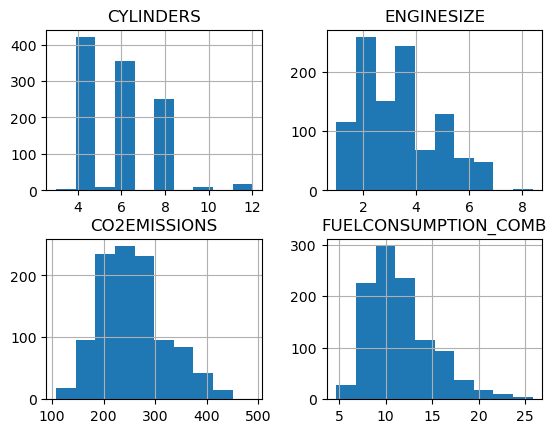

In [6]:
makeHist = readCertainCols[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
makeHist.hist()
matplotlib.pyplot.show()

### Plotting Each Independent Value Against Dependent

Now, you can plot each column against the "Emissions" column to see the nature of their relationship

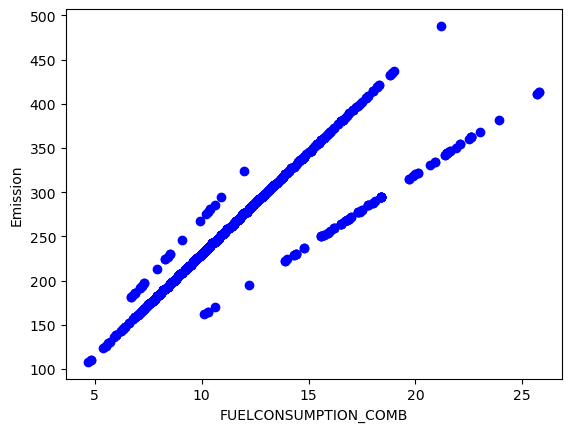

In [7]:
matplotlib.pyplot.scatter(readCertainCols.FUELCONSUMPTION_COMB, readCertainCols.CO2EMISSIONS,  color='blue')
matplotlib.pyplot.xlabel("FUELCONSUMPTION_COMB")
matplotlib.pyplot.ylabel("Emission")
matplotlib.pyplot.show()

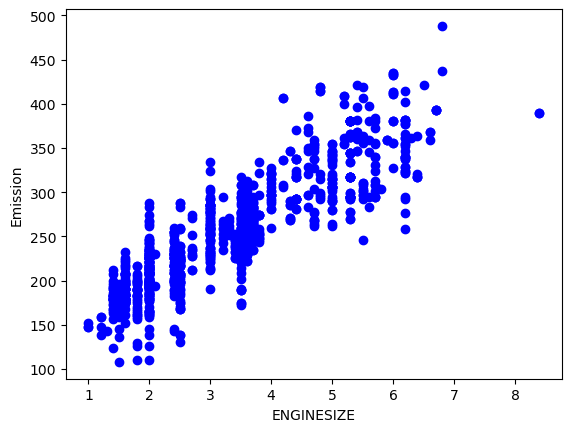

In [8]:
matplotlib.pyplot.scatter(readCertainCols.ENGINESIZE, readCertainCols.CO2EMISSIONS,  color='blue')
matplotlib.pyplot.xlabel("ENGINESIZE")
matplotlib.pyplot.ylabel("Emission")
matplotlib.pyplot.show()

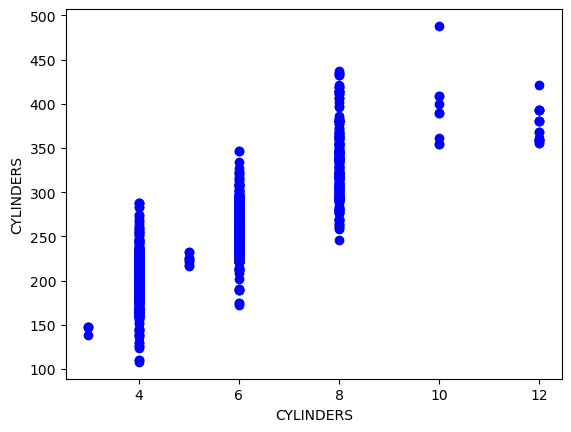

In [9]:
matplotlib.pyplot.scatter(readCertainCols.CYLINDERS, readCertainCols.CO2EMISSIONS,  color='blue')
matplotlib.pyplot.xlabel("CYLINDERS")
matplotlib.pyplot.ylabel("CYLINDERS")
matplotlib.pyplot.show()

## 2) Creating Test/Train Sets

### Creating Sets

Using the numpy.random.rand() function, we will create a 1D array with the number of random values = number of rows in our dataset between 0 and 1.

"msk" is the boolean array the result is stored in. if the i-th value of the numpy.random.rand() < 0.8, then msk[i] = true.

In "train", we store 80% of the data from specific columns of our dataset. In "test", we invert "msk" to store 20% of specific columns of the dataset.

In [10]:
msk = numpy.random.rand(len(readFile)) < 0.8
train = readCertainCols[msk]
test = readCertainCols[~msk]

### Visualising Train-Set

From the 80% dataset that we are using to train, we will plot it just to visualise the data:

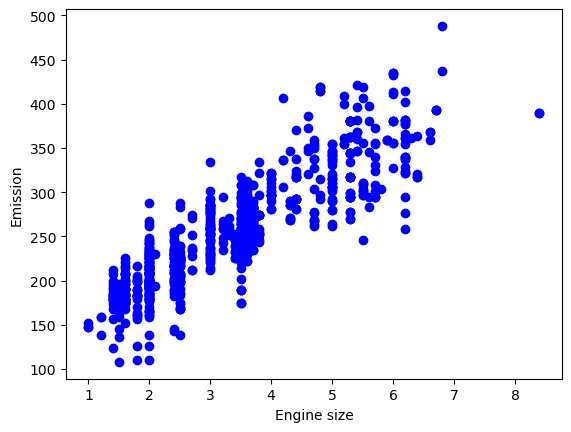

In [11]:
matplotlib.pyplot.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
matplotlib.pyplot.xlabel("Engine size")
matplotlib.pyplot.ylabel("Emission")
matplotlib.pyplot.show()

### Regressing Train-Set

Now, we will perform a simple regression on this 80% train-dataset to calculate the θ1 and θ2 coefficients in ŷ = θ1 + xθ2

numpy.asanyarray() returns all values in the train-dataset's specific column as an array that we have divided into X and Y.

Then we will perform a linear regression on the arrays to return the θ1 (intercept) and θ2 (coefficient).

In [12]:
from sklearn.linear_model import LinearRegression

train_x = numpy.asanyarray(train[['ENGINESIZE']])
train_y = numpy.asanyarray(train[['CO2EMISSIONS']])

regr = LinearRegression().fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.14504135]]
Intercept:  [124.76603432]


### Plotting Regression Line

Next, you can plot the regression line against your scatter graph. The scatter() code is copied from above.

The plot() function is used to plot a linear graph. The first parameter is the X values of our train-dataset, and the second parameter is the corresponding Y values that we calculate using ŷ = θ1 + xθ2.

Text(0, 0.5, 'Emission')

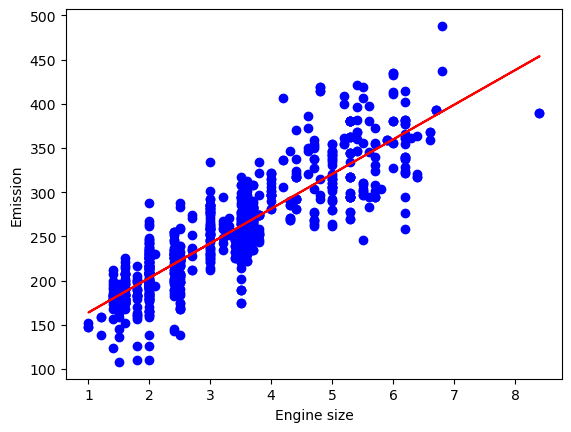

In [13]:
matplotlib.pyplot.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
matplotlib.pyplot.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
matplotlib.pyplot.xlabel("Engine size")
matplotlib.pyplot.ylabel("Emission")

### Testing via Test-Set

From the 20% test-set, return them as arrays of X and Y values.

In [14]:
test_x = numpy.asanyarray(test[['ENGINESIZE']])
test_y = numpy.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

mae = numpy.mean(numpy.absolute(test_y_ - test_y))
mse = numpy.mean((test_y_ - test_y) ** 2)

print("Mean absolute error (MAE): " + '%.2f' % mae)
print("Mean Squared Error (MSE): " + '%.2f' % mse)

from sklearn.metrics import r2_score

r2Score = r2_score(test_y , test_y_)
print("R2-score: " + '%.2f' % r2Score)

Mean absolute error (MAE): 24.63
Mean Squared Error (MSE): 1042.36
R2-score: 0.76


# Training Data on Different X

Plotting the 80% train-dataset of CO2 Emissions aginst Fuel Consumption

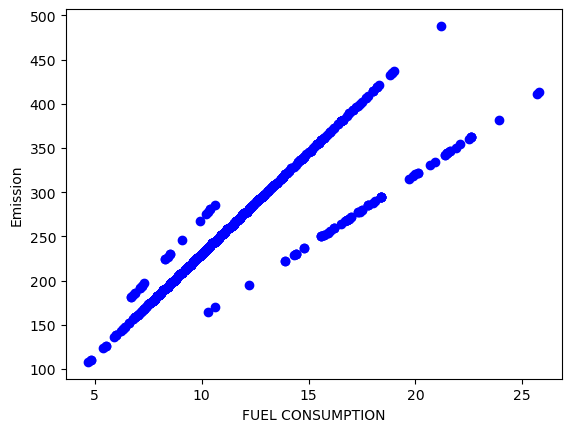

Coefficients:  [[16.21191251]]
Intercept:  [68.43301241]
Mean absolute error (MAE): 20.85
Mean Squared Error (MSE): 830.73
R2-score: 0.81


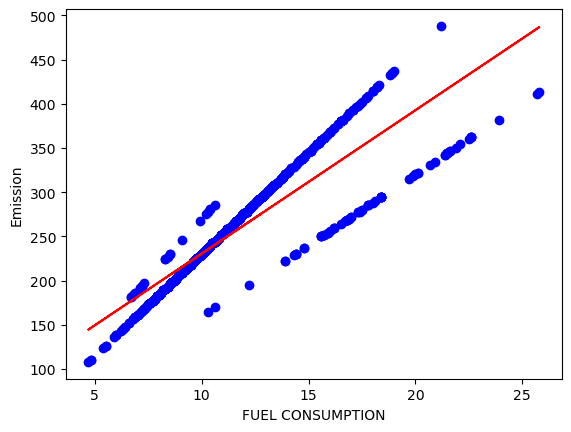

In [15]:
matplotlib.pyplot.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
matplotlib.pyplot.xlabel("FUEL CONSUMPTION")
matplotlib.pyplot.ylabel("Emission")
matplotlib.pyplot.show()

# --- 

train_x = numpy.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = numpy.asanyarray(train[['CO2EMISSIONS']])

regr = LinearRegression().fit(train_x, train_y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

# ---

matplotlib.pyplot.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
matplotlib.pyplot.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
matplotlib.pyplot.xlabel("FUEL CONSUMPTION")
matplotlib.pyplot.ylabel("Emission")

# ---

test_x = numpy.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = numpy.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

mae = numpy.mean(numpy.absolute(test_y_ - test_y))
mse = numpy.mean((test_y_ - test_y) ** 2)

print("Mean absolute error (MAE): " + '%.2f' % mae)
print("Mean Squared Error (MSE): " + '%.2f' % mse)

r2Score = r2_score(test_y , test_y_)
print("R2-score: " + '%.2f' % r2Score)

# Conclusion

The R2 score of training against Fuel Consumption is higher, and the MAE and MSE are lower. So, it's better to train using Fuel Consumption.